In [1]:
import midi
import glob
import numpy as np
import pretty_midi
from mgeval import core, utils
import seaborn as sns
from sklearn.model_selection import LeaveOneOut

import matplotlib.pyplot as plt

# BETA.
# This file compares datasets. While it tests differences, it so far does NOT take into account 
# the difference of lengths of music. Dataset contains full music pieces of 200+ bars, while
# generated examples only have 8 bars. This is currently being addressed.

In [2]:
dataset_files = glob.glob('dataset_MIDI/*')  # replace with dataset path

num_samples = 40

metrics = core.metrics()

In [3]:
dataset_eval = {'total_used_pitch':np.zeros((num_samples,1)),
            'total_pitch_class_histogram':np.zeros((num_samples,12)),
            'pitch_range':np.zeros((num_samples,1)),
            'total_used_note':np.zeros((num_samples,1)),
            'note_length_hist':np.zeros((num_samples,12)),
            }
metrics_list = list(dataset_eval.keys())  # Convert dict_keys to a list
for i in range(0, num_samples):
    feature = core.extract_feature(dataset_files[i])
    for j in range(5): # There are 5 features currently set
        dataset_eval[metrics_list[j]][i] = getattr(core.metrics(), metrics_list[j])(feature)


In [4]:
generated_files = glob.glob('test_MIDI/*.mid')  # replace with path to generated files

generated_eval = {'total_used_pitch':np.zeros((num_samples,1)),
            'total_pitch_class_histogram':np.zeros((num_samples,12)),
            'pitch_range':np.zeros((num_samples,1)),
            'total_used_note':np.zeros((num_samples,1)),
            'note_length_hist':np.zeros((num_samples,12)),
            }
print(generated_files)
for i in range(0, num_samples):
    feature = core.extract_feature(generated_files[i])
    for j in range(5): # There are 5 features currently set
        generated_eval[metrics_list[j]][i] = getattr(core.metrics(), metrics_list[j])(feature)

['test_MIDI/epoch080_sample03.mid', 'test_MIDI/epoch080_sample02.mid', 'test_MIDI/epoch080_sample00.mid', 'test_MIDI/epoch080_sample01.mid', 'test_MIDI/epoch080_sample04.mid', 'test_MIDI/epoch010_sample02.mid', 'test_MIDI/epoch010_sample03.mid', 'test_MIDI/epoch010_sample01.mid', 'test_MIDI/epoch010_sample00.mid', 'test_MIDI/epoch010_sample04.mid', 'test_MIDI/epoch010_sample02 3.mid', 'test_MIDI/epoch010_sample04 5.mid', 'test_MIDI/epoch080_sample01 2.mid', 'test_MIDI/epoch080_sample01 3.mid', 'test_MIDI/epoch010_sample04 4.mid', 'test_MIDI/epoch010_sample02 2.mid', 'test_MIDI/epoch010_sample00 2.mid', 'test_MIDI/epoch080_sample03 3.mid', 'test_MIDI/epoch010_sample04 6.mid', 'test_MIDI/epoch080_sample03 2.mid', 'test_MIDI/epoch010_sample00 3.mid', 'test_MIDI/epoch010_sample02 5.mid', 'test_MIDI/epoch080_sample03 6.mid', 'test_MIDI/epoch010_sample04 3.mid', 'test_MIDI/epoch080_sample01 4.mid', 'test_MIDI/epoch080_sample01 5.mid', 'test_MIDI/epoch010_sample04 2.mid', 'test_MIDI/epoch080_

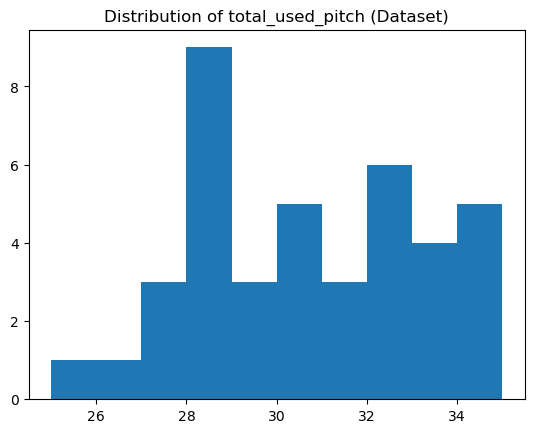

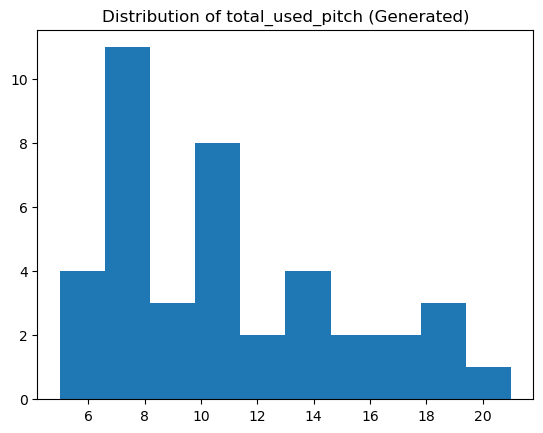

In [15]:
plt.hist(dataset_eval["total_used_pitch"])
plt.title("Distribution of total_used_pitch (Dataset)")
plt.show()
plt.hist(generated_eval["total_used_pitch"])
plt.title("Distribution of total_used_pitch (Generated)")
plt.show()

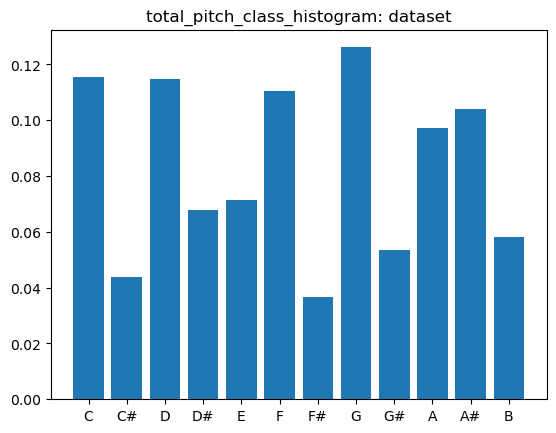

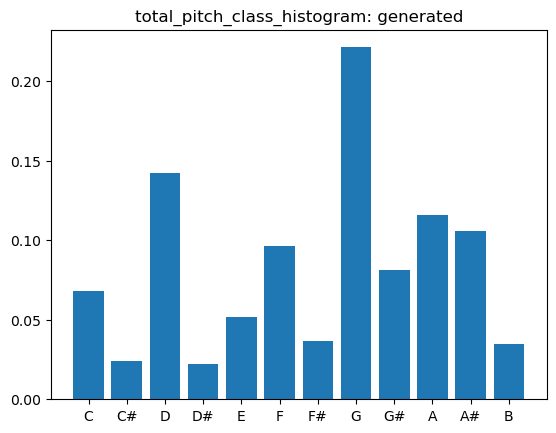

In [13]:
# print(dataset_eval["total_pitch_class_histogram"])
# print(generated_eval["total_pitch_class_histogram"])


summed_dataset_histogram = np.sum(dataset_eval["total_pitch_class_histogram"] , axis=0)
summed_generated_histogram =np.sum(generated_eval["total_pitch_class_histogram"] , axis=0)

pitch_classes = ["C", "C#", "D", "D#", "E", "F", "F#", "G", 'G#', 'A', "A#", 'B']

plt.bar(pitch_classes, summed_dataset_histogram/num_samples)
plt.xticks(range(12), pitch_classes)
plt.title("total_pitch_class_histogram: dataset")
plt.show()

plt.bar(pitch_classes, summed_generated_histogram/num_samples)
plt.xticks(range(12), pitch_classes)
plt.title("total_pitch_class_histogram: generated")
plt.show()

In [70]:
for i in range(0, len(metrics_list)):
    print(metrics_list[i] + ':')
    print('------------------------')
    print(' Dataset')
    print('  mean: ', np.mean(dataset_eval[metrics_list[i]], axis=0))
    print('  std: ', np.std(dataset_eval[metrics_list[i]], axis=0))

    print('------------------------')
    print(' Generated')
    print('  mean: ', np.mean(generated_eval[metrics_list[i]], axis=0))
    print('  std: ', np.std(generated_eval[metrics_list[i]], axis=0))
    print()

total_used_pitch:
------------------------
 demo_set 1
  mean:  [30.25]
  std:  [2.57633461]
------------------------
 demo_set 2
  mean:  [10.9]
  std:  [4.09145451]

total_pitch_class_histogram:
------------------------
 demo_set 1
  mean:  [0.11556179 0.04397304 0.11495836 0.0678785  0.07146265 0.11035662
 0.03653167 0.12615281 0.05365901 0.09722626 0.10403668 0.0582026 ]
  std:  [0.03276144 0.03401509 0.04415911 0.04844067 0.02935505 0.02623718
 0.01580403 0.03853374 0.03514718 0.03527064 0.04347495 0.02206438]
------------------------
 demo_set 2
  mean:  [0.06793272 0.02376432 0.14247927 0.0221634  0.05176997 0.09621608
 0.03686307 0.22122158 0.08102649 0.11565118 0.10603249 0.03487943]
  std:  [0.10362111 0.04033702 0.14776946 0.03628613 0.05667703 0.07083667
 0.06187302 0.19548683 0.08524952 0.11291342 0.16634681 0.04166841]

pitch_range:
------------------------
 demo_set 1
  mean:  [30.125]
  std:  [2.99322151]
------------------------
 demo_set 2
  mean:  [16.875]
  std:  [5

In [71]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
set1_intra = np.zeros((num_samples, len(metrics_list), num_samples-1)) # -1 worked?!
set2_intra = np.zeros((num_samples, len(metrics_list), num_samples-1))
for i in range(len(metrics_list)):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        set1_intra[test_index[0]][i] = utils.c_dist(dataset_eval[metrics_list[i]][test_index], dataset_eval[metrics_list[i]][train_index])
        set2_intra[test_index[0]][i] = utils.c_dist(generated_eval[metrics_list[i]][test_index], generated_eval[metrics_list[i]][train_index])



In [72]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
sets_inter = np.zeros((num_samples, len(metrics_list), num_samples))

for i in range(len(metrics_list)):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        sets_inter[test_index[0]][i] = utils.c_dist(dataset_eval[metrics_list[i]][test_index], generated_eval[metrics_list[i]])

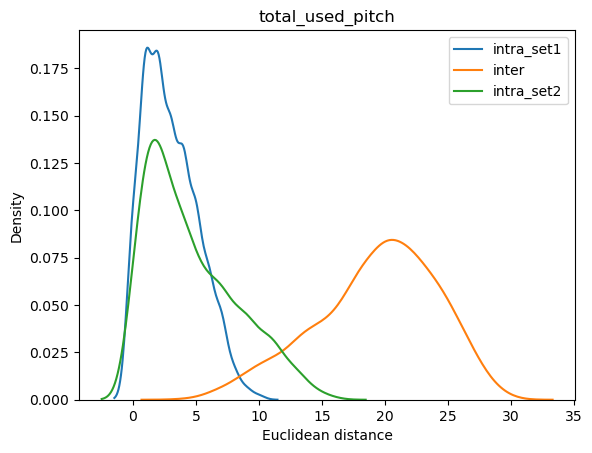

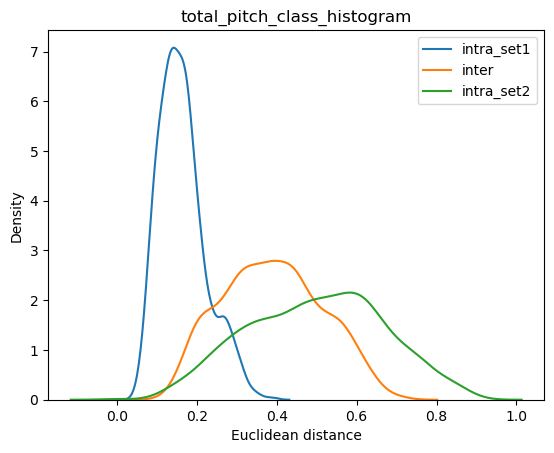

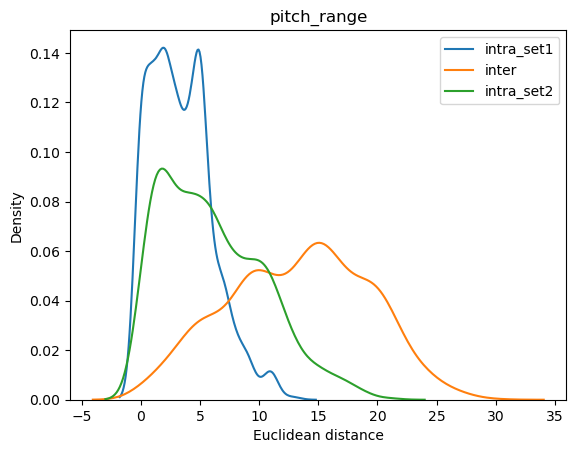

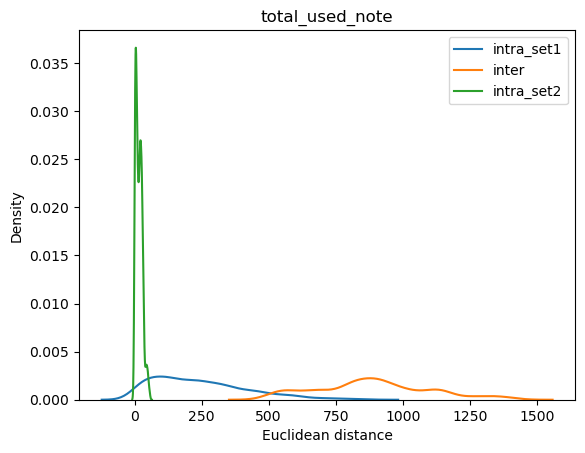

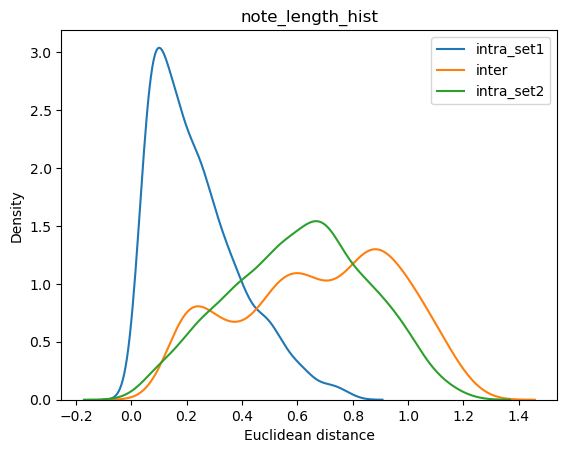

In [76]:
plot_set1_intra = np.transpose(set1_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_set2_intra = np.transpose(set2_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_sets_inter = np.transpose(sets_inter,(1, 0, 2)).reshape(len(metrics_list), -1)
for i in range(0,len(metrics_list)):
    sns.kdeplot(plot_set1_intra[i], label='intra_set1')
    sns.kdeplot(plot_sets_inter[i], label='inter')
    sns.kdeplot(plot_set2_intra[i], label='intra_set2')

    plt.title(metrics_list[i])
    plt.xlabel('Euclidean distance')
    plt.legend()
    plt.show()

In [78]:
for i in range(0, len(metrics_list)):
    print (metrics_list[i] + ':')
    print ('------------------------')
    print (' Dataset')
    print ('  Kullback–Leibler divergence:',utils.kl_dist(plot_set1_intra[i], plot_sets_inter[i]))
    print ('  Overlap area:', utils.overlap_area(plot_set1_intra[i], plot_sets_inter[i]))
    
    print (' Generated')
    print ('  Kullback–Leibler divergence:',utils.kl_dist(plot_set2_intra[i], plot_sets_inter[i]))
    print ('  Overlap area:', utils.overlap_area(plot_set2_intra[i], plot_sets_inter[i]))
    

total_used_pitch:
------------------------
 Dataset
  Kullback–Leibler divergence: 0.9605770167023058
  Overlap area: 0.03427326284472397
 Generated
  Kullback–Leibler divergence: 1.0986304707959673
  Overlap area: 0.13511409765092233
total_pitch_class_histogram:
------------------------
 Dataset
  Kullback–Leibler divergence: 0.22628077023394963
  Overlap area: 0.2606122420821559
 Generated
  Kullback–Leibler divergence: 0.11640707690838725
  Overlap area: 0.6950664530901375
pitch_range:
------------------------
 Dataset
  Kullback–Leibler divergence: 0.36945338398713207
  Overlap area: 0.25858756552303763
 Generated
  Kullback–Leibler divergence: 0.28701230849522885
  Overlap area: 0.5068450074141041
total_used_note:
------------------------
 Dataset
  Kullback–Leibler divergence: 0.21694613916556868
  Overlap area: 0.1224972239788822
 Generated
  Kullback–Leibler divergence: 0.16586590036700177
  Overlap area: 5.623180696951045e-20
note_length_hist:
------------------------
 Dataset